In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# reading the images
refrence_img = cv2.imread('/content/GeorgiaCypress.jpg')
refrence_img = cv2.cvtColor(refrence_img, cv2.COLOR_BGR2RGB)

target_img = cv2.imread('/content/Cecropia.jpg')
target_img = cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB)

In [ ]:
plt.rcParams['figure.figsize'] =(9,6)

Text(0.5, 1.0, 'Target Image')

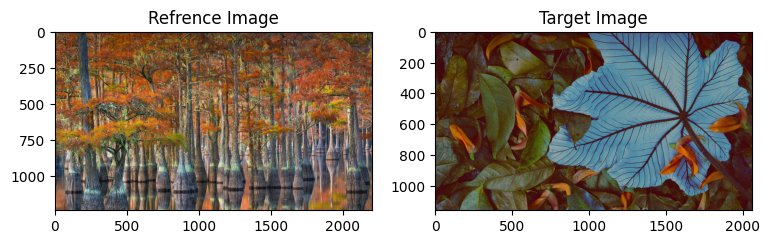

In [ ]:
# plotting the images
fig , axs = plt.subplots(1,2)
axs[0].imshow(refrence_img)
axs[0].set_title("Refrence Image")
axs[1].imshow(target_img)
axs[1].set_title('Target Image')

Text(0.5, 0.98, 'Refrence Image Histograms(PDFs)')

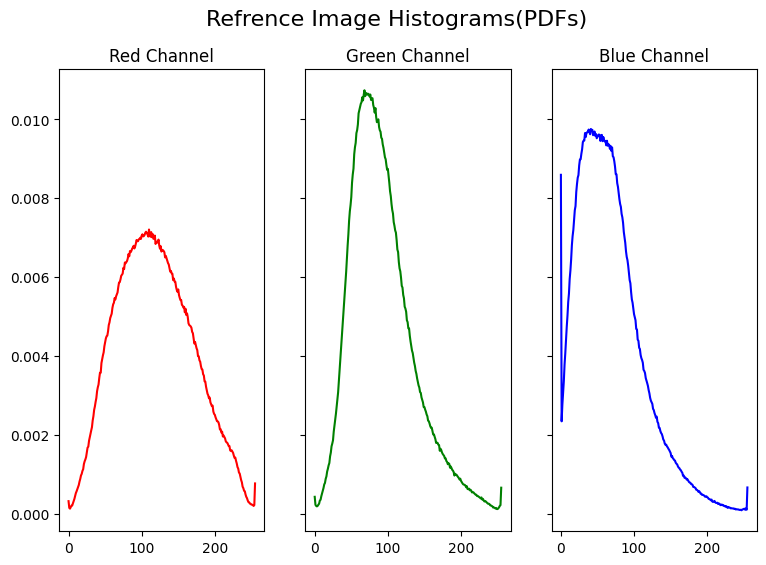

In [ ]:
# plotting the Refrence image histograms
fig, axs = plt.subplots(1, 3,sharey=True)
num_ref = refrence_img.shape[0] * refrence_img.shape[1]
axs[0].plot(range(256), cv2.calcHist([refrence_img],[0],None,[256],[0,256])/num_ref ,'r')
axs[0].set_title("Red Channel")
axs[1].plot(range(256), cv2.calcHist([refrence_img],[1],None,[256],[0,256])/num_ref, 'g')
axs[1].set_title("Green Channel")
axs[2].plot(range(256), cv2.calcHist([refrence_img],[2],None,[256],[0,256])/num_ref , 'b')
axs[2].set_title("Blue Channel")
fig.suptitle('Refrence Image Histograms(PDFs)', fontsize=16)

Text(0.5, 0.98, 'Target Image Histograms(PDFs)')

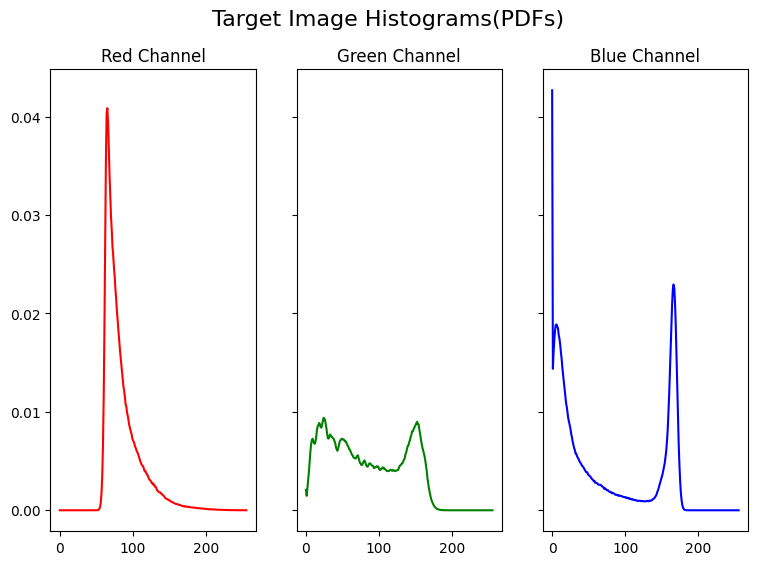

In [ ]:
# plotting the Target image histograms
fig, axs = plt.subplots(1, 3,sharey=True)
num_ta = target_img.shape[0]*target_img.shape[1]
axs[0].plot(range(256), cv2.calcHist([target_img],[0],None,[256],[0,256])/num_ta ,'r')
axs[0].set_title("Red Channel")
axs[1].plot(range(256), cv2.calcHist([target_img],[1],None,[256],[0,256])/num_ta, 'g')
axs[1].set_title("Green Channel")
axs[2].plot(range(256), cv2.calcHist([target_img],[2],None,[256],[0,256])/num_ta , 'b')
axs[2].set_title("Blue Channel")
fig.suptitle('Target Image Histograms(PDFs)', fontsize=16)

Text(0.5, 0.98, 'Refrence Image CDFs')

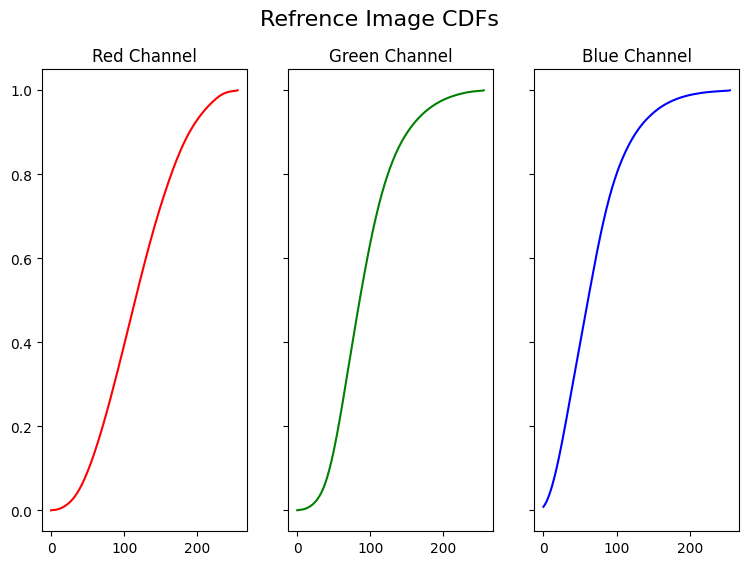

In [ ]:
# plotting the Refrence image CDFs
fig, axs = plt.subplots(1, 3,sharey=True)
num_ref = refrence_img.shape[0] * refrence_img.shape[1]
axs[0].plot(range(256), np.cumsum(cv2.calcHist([refrence_img],[0],None,[256],[0,256]))/num_ref ,'r')
axs[0].set_title("Red Channel")
axs[1].plot(range(256), np.cumsum(cv2.calcHist([refrence_img],[1],None,[256],[0,256]))/num_ref, 'g')
axs[1].set_title("Green Channel")
axs[2].plot(range(256), np.cumsum(cv2.calcHist([refrence_img],[2],None,[256],[0,256]))/num_ref , 'b')
axs[2].set_title("Blue Channel")
fig.suptitle('Refrence Image CDFs', fontsize=16)

Text(0.5, 0.98, 'Target Image CDFs')

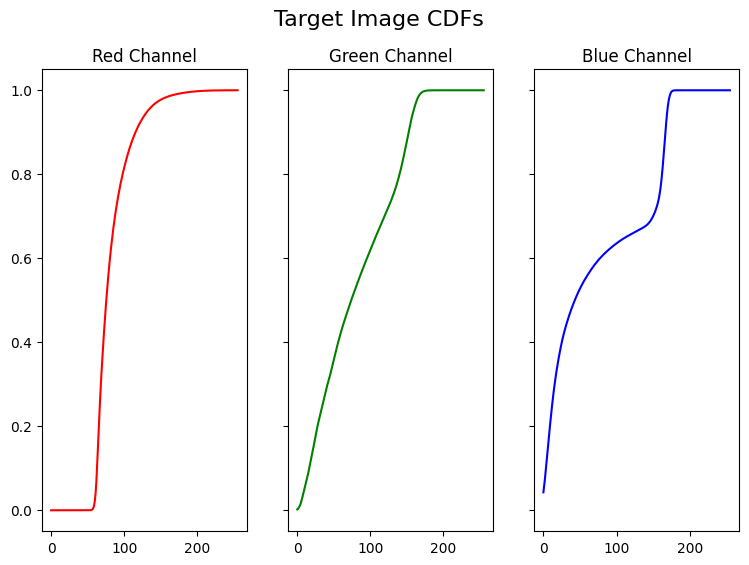

In [ ]:
# plotting the Target image CDFs
fig, axs = plt.subplots(1, 3,sharey=True)
num_ta = target_img.shape[0]*target_img.shape[1]
axs[0].plot(range(256), np.cumsum(cv2.calcHist([target_img],[0],None,[256],[0,256]))/num_ta ,'r')
axs[0].set_title("Red Channel")
axs[1].plot(range(256), np.cumsum(cv2.calcHist([target_img],[1],None,[256],[0,256]))/num_ta, 'g')
axs[1].set_title("Green Channel")
axs[2].plot(range(256),np.cumsum(cv2.calcHist([target_img],[2],None,[256],[0,256]))/num_ta , 'b')
axs[2].set_title("Blue Channel")
fig.suptitle('Target Image CDFs', fontsize=16)

In [ ]:
#implementation of histogram matching
def matching_histograms(src,dst):
    src_values, src_unique_indices, src_counts = np.unique(src.ravel(), return_counts=True, return_inverse=True)
    dst_values, dst_counts = np.unique(dst.ravel(), return_counts=True)
    src_cdf = np.cumsum(src_counts) / len(src)
    dst_cdf = np.cumsum(dst_counts) / len(dst)
    matched_src = np.interp(src_cdf, dst_cdf, dst_values)
    return matched_src[src_unique_indices].reshape(src.shape)

In [ ]:
result_img = np.zeros(target_img.shape)
result_img[:,:,0] = matching_histograms(target_img[:,:,0], refrence_img[:,:,0])
result_img[:,:,1] = matching_histograms(target_img[:,:,1], refrence_img[:,:,1])
result_img[:,:,2] = matching_histograms(target_img[:,:,2], refrence_img[:,:,2])

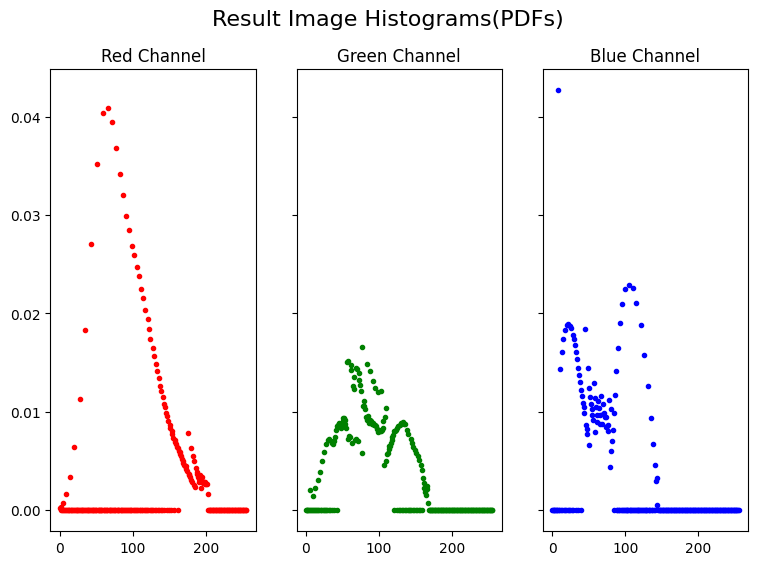

In [ ]:
# plotting the Result image histograms
result_img = result_img.astype(np.uint8)
fig, axs = plt.subplots(1, 3,sharey=True)
num_re = result_img.shape[0]*result_img.shape[1]
axs[0].plot(range(256), cv2.calcHist([result_img],[0],None,[256],[0,256])/num_re ,'r.')
axs[0].set_title("Red Channel")
axs[1].plot(range(256), cv2.calcHist([result_img],[1],None,[256],[0,256])/num_re, 'g.')
axs[1].set_title("Green Channel")
axs[2].plot(range(256), cv2.calcHist([result_img],[2],None,[256],[0,256])/num_re , 'b.')
axs[2].set_title("Blue Channel")
fig.suptitle('Result Image Histograms(PDFs)', fontsize=16)
plt.savefig('result-01.jpg')

Text(0.5, 0.98, 'Result Image CDFs')

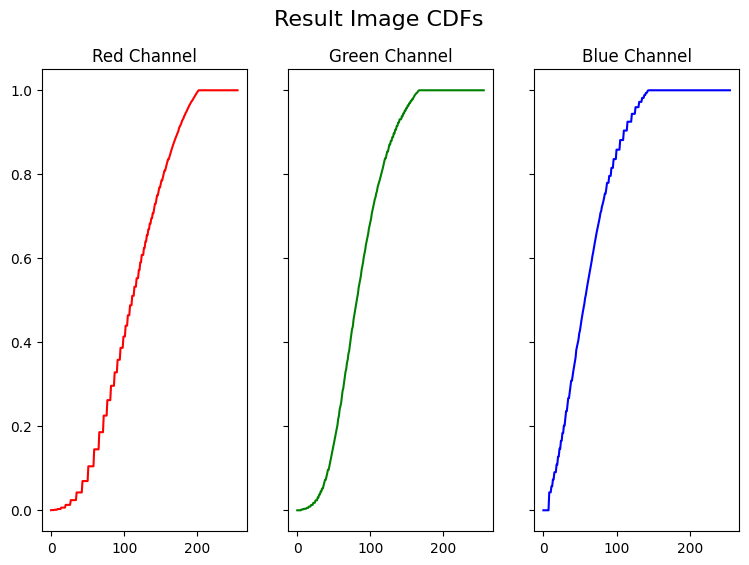

In [ ]:
# plotting the Result image CDFs
fig, axs = plt.subplots(1, 3,sharey=True)
axs[0].plot(range(256), np.cumsum(cv2.calcHist([result_img],[0],None,[256],[0,256]))/num_re ,'r')
axs[0].set_title("Red Channel")
axs[1].plot(range(256), np.cumsum(cv2.calcHist([result_img],[1],None,[256],[0,256]))/num_re, 'g')
axs[1].set_title("Green Channel")
axs[2].plot(range(256),np.cumsum(cv2.calcHist([result_img],[2],None,[256],[0,256]))/num_re , 'b')
axs[2].set_title("Blue Channel")
fig.suptitle('Result Image CDFs', fontsize=16)

Text(0.5, 1.0, 'Final Image')

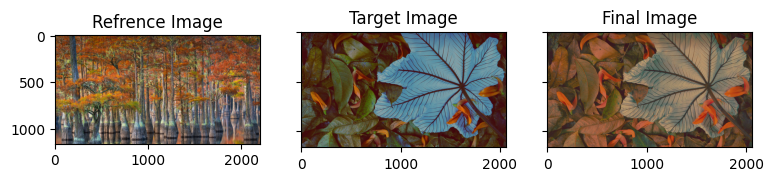

In [ ]:
# plotting the images
fig , axs = plt.subplots(1,3,sharey=True)
axs[0].imshow(refrence_img)
axs[0].set_title("Refrence Image")
axs[1].imshow(target_img)
axs[1].set_title("Target Image")
axs[2].imshow(result_img)
axs[2].set_title('Final Image')

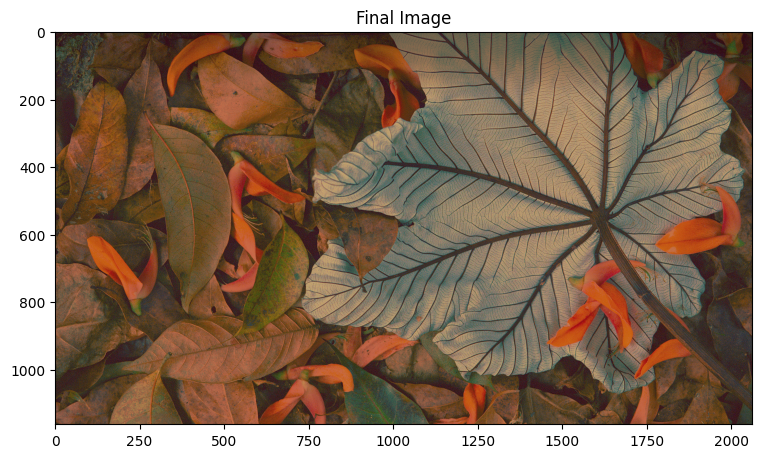

In [ ]:
# plotting and saving the final image
plt.imshow(result_img)
plt.title('Final Image')
import matplotlib.image as mpimg
mpimg.imsave('result-02.jpg',result_img)

The input images src and dst are flattened using the ravel() method and their unique values are computed along with their corresponding counts using the np.unique() method. The return_inverse=True argument also returns an array of indices such that src_unique_indices[i] is the index of the i-th unique value in src.
The cumulative distribution functions (CDFs) of the pixel value distributions of src and dst are computed by dividing their counts by the total number of pixels and cumulatively summing the result.
Linear interpolation is used to find new pixel values for src that match the CDF of dst. Specifically, for each value in the CDF of src, the corresponding value in the CDF of dst is found using linear interpolation, and the pixel value in dst with the closest matching CDF value is assigned to the corresponding pixel in src.
The matched pixel values are returned as an array, reshaped to the shape of src.
This function assumes that both input images have the same shape and are grayscale.So we apply histogram matching separately to each color channel.